## **Caso 3** ##

### Agrupamiento con metodología asum-dm ###



1. **Entendimiento del negocio**  
2. **Entendimiento de los datos**  
3. **Preparación de los datos**  
4. **Modelado**  
5. **Evaluación**  
6. **Despliegue (conclusiones)**

In [ ]:
# Tratamiento estructurado de datos
import pandas as pd
import numpy as np
# Gráficos
import matplotlib.pyplot as plt
import seaborn as sns

# Advertencias
import warnings
warnings.filterwarnings('ignore')

### 1. Entendimiento del negocio

1. **Entendimiento:** La naviera quiere conocer las diferencias operacionales entre los barcos de su flota con el objetivo de mejorar las condiciones de trabajo de sus trabajadores y de la experiencia de los clientes de esta misma.

2. **Enfoque Analítico:** Queremos diseñar un metodo que nos permita agrupar correctamente los barcos, de manera subjetiva los técnicos creen que se pueden dividir en dos grupos, con el modelo buscamos afirmar o rechazar esta hipotisis justificando la desición.

3. **Requerimiento de Datos:** Se requieren *datos de los barcos y del transporte de mercancías*

4. **Recolección de Datos:** Los datos son brindados por en problema


### 2. Entendimiento de los datos 
- Identificar la existencia de datos nulos
- Exploración univariada de los datos
- Exploración multivariada de los datos
- Identificación de correlación y multicolinealidad

In [2]:
data = pd.read_csv('datos_caso_3.csv')
data

,Date,Ship_Type,Route_Type,Engine_Type,Maintenance_Status,Speed_Over_Ground_knots,Engine_Power_kW,Distance_Traveled_nm,Draft_meters,Weather_Condition,Cargo_Weight_tons,Operational_Cost_USD,Revenue_per_Voyage_USD,Turnaround_Time_hours,Efficiency_nm_per_kWh,Seasonal_Impact_Score,Weekly_Voyage_Count,Average_Load_Percentage
0,2023-06-04,Container Ship,NaN,Heavy Fuel Oil (HFO),Critical,12.597558,2062.983982,1030.943616,14.132284,Moderate,1959.017882,483832.354540,292183.273104,25.867077,1.455179,1.415653,1,93.769249
1,2023-06-11,Fish Carrier,Short-haul,Steam Turbine,Good,10.387580,1796.057415,1060.486382,14.653083,Rough,162.394712,483388.000509,883765.787360,63.248196,0.290361,0.885648,6,93.895372
2,2023-06-18,Container Ship,Long-haul,Diesel,Fair,20.749747,1648.556685,658.874144,7.199261,Moderate,178.040917,448543.404044,394018.746904,49.418150,0.499595,1.405813,9,96.218244
3,2023-06-25,Bulk Carrier,Transoceanic,Steam Turbine,Fair,21.055102,915.261795,1126.822519,11.789063,Moderate,1737.385346,261349.605449,87551.375175,22.409110,0.702906,1.370704,1,66.193698
4,2023-07-02,Fish Carrier,Transoceanic,Diesel,Fair,13.742777,1089.721803,1445.281159,9.727833,Moderate,260.595103,287718.375160,676121.459632,64.158231,1.331343,0.583383,8,80.008581
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2731,2024-06-02,Tanker,Short-haul,Heavy Fuel Oil (HFO),Good,11.607997,2918.395972,239.990359,13.700906,Moderate,318.111891,237975.067292,731584.322921,47.152337,1.000265,1.284895,3,74.813114
2732,2024-06-09,Bulk Carrier,Short-haul,Heavy Fuel Oil (HFO),Good,13.852798,2161.282358,831.355653,14.612775,NaN,218.309002,21029.021721,374365.370930,64.325916,0.653474,0.891085,2,84.595155
2733,2024-06-16,Container Ship,Short-haul,Steam Turbine,Critical,16.813713,1343.608006,1376.460622,9.306518,NaN,1630.646419,78883.312529,234120.365052,53.551090,0.594169,0.725404,6,80.975269
2734,2024-06-23,Tanker,Transoceanic,Heavy Fuel Oil (HFO),Good,23.132643,2028.143572,619.236340,6.623856,Moderate,153.441965,25241.550250,799713.737211,14.335517,0.895670,0.902960,2,92.853622


#### 1.1 Identificacion de tipos de variable y datos nulos 

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2736 entries, 0 to 2735
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Date                     2736 non-null   object 
 1   Ship_Type                2600 non-null   object 
 2   Route_Type               2600 non-null   object 
 3   Engine_Type              2600 non-null   object 
 4   Maintenance_Status       2600 non-null   object 
 5   Speed_Over_Ground_knots  2736 non-null   float64
 6   Engine_Power_kW          2736 non-null   float64
 7   Distance_Traveled_nm     2736 non-null   float64
 8   Draft_meters             2736 non-null   float64
 9   Weather_Condition        2600 non-null   object 
 10  Cargo_Weight_tons        2736 non-null   float64
 11  Operational_Cost_USD     2736 non-null   float64
 12  Revenue_per_Voyage_USD   2736 non-null   float64
 13  Turnaround_Time_hours    2736 non-null   float64
 14  Efficiency_nm_per_kWh   

In [4]:
total = len(data)
nulos = data.isnull().sum()
porcentaje_nulos = (nulos / total) * 100
resumen_nulos = pd.DataFrame({'Nulos': nulos, 'Total': total, 'Porcentaje': porcentaje_nulos})
print(resumen_nulos)

                         Nulos  Total  Porcentaje
Date                         0   2736     0.00000
Ship_Type                  136   2736     4.97076
Route_Type                 136   2736     4.97076
Engine_Type                136   2736     4.97076
Maintenance_Status         136   2736     4.97076
Speed_Over_Ground_knots      0   2736     0.00000
Engine_Power_kW              0   2736     0.00000
Distance_Traveled_nm         0   2736     0.00000
Draft_meters                 0   2736     0.00000
Weather_Condition          136   2736     4.97076
Cargo_Weight_tons            0   2736     0.00000
Operational_Cost_USD         0   2736     0.00000
Revenue_per_Voyage_USD       0   2736     0.00000
Turnaround_Time_hours        0   2736     0.00000
Efficiency_nm_per_kWh        0   2736     0.00000
Seasonal_Impact_Score        0   2736     0.00000
Weekly_Voyage_Count          0   2736     0.00000
Average_Load_Percentage      0   2736     0.00000


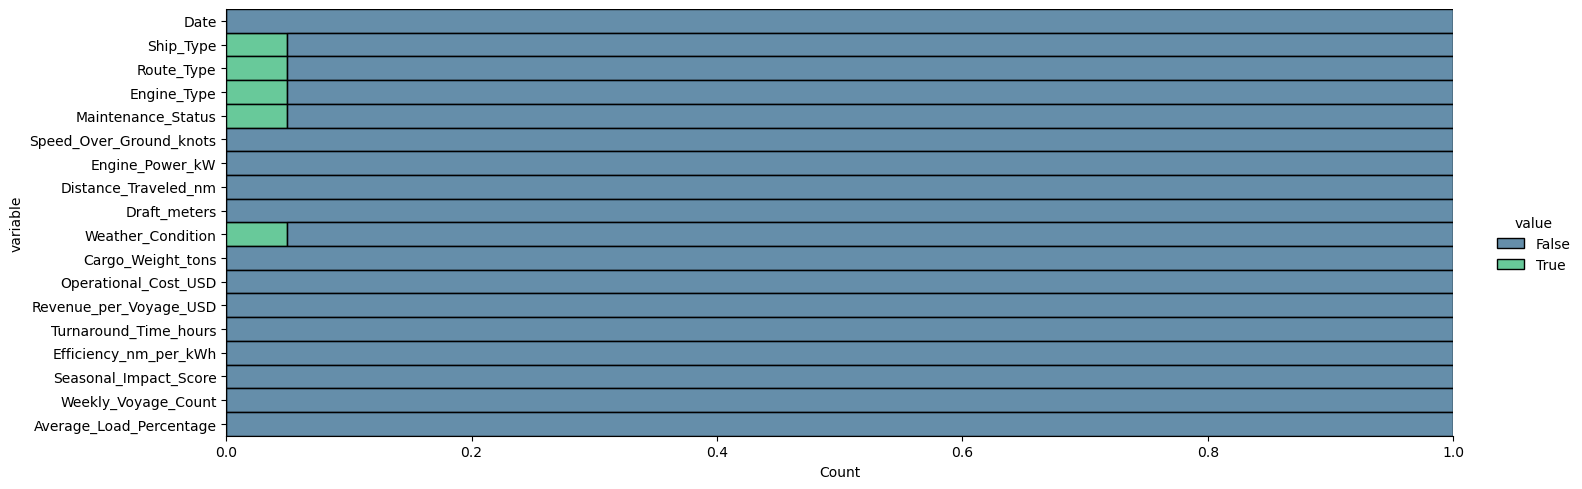

In [5]:
# Visualización de la existencia de datos nulos por variable
data.isnull().melt().pipe(lambda df: sns.displot(data=df, y = 'variable', palette='viridis', hue='value', multiple='fill', aspect=3))
plt.show()

 #### 1.1. Exploración de los datos 
 ##### a. Variables númericas

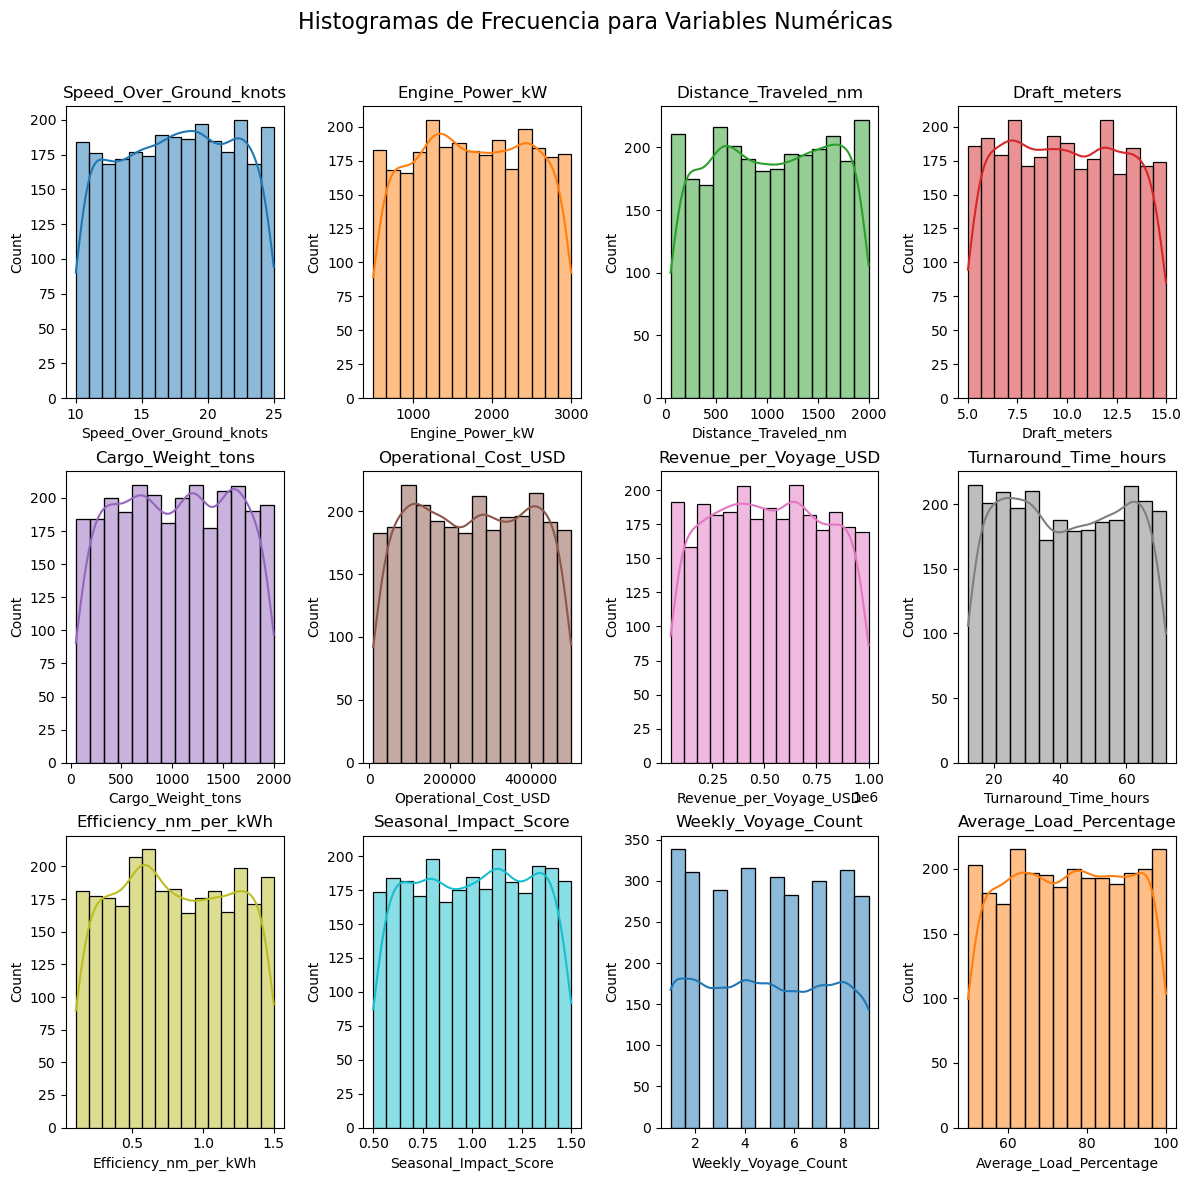

In [ ]:

fig, ax = plt.subplots(3, 4, figsize=(12, 12))
ax = ax.flat
num_col = data.select_dtypes(include=['int64', 'float64']).columns # SOLO VAMOS A GRAFICAR VARIABLES NUMÉRICAS
for i, col in enumerate(num_col):
    sns.histplot(
        data = data,
        x = col,
        kde = True,
        color = (list(plt.rcParams['axes.prop_cycle']) * 7)[i]['color'],
        ax = ax[i]
    )
    ax[i].set_title(col)
fig.tight_layout()
fig.subplots_adjust(top=0.90)
fig.suptitle('Histogramas de Frecuencia para Variables Numéricas', fontsize=16)
plt.show()

##### b. Variables categoricas 

In [ ]:
fig, ax = plt.subplots(2 , 3 , figsize=(11,11))
ax =ax.flat
cat_col = data.select_dtypes(include='object').columns

for i, col in enumerate(cat_col):
 ax[i].pie(x = data[col].value_counts(),
          labels = data[col].value_counts().index,
          autopct = '%.1f%%')
 ax[i].set_title(col)
 fig.tight_layout()
 fig.suptitle('Gráficos de Torta para Variables Categóricas', fontsize=16)
plt.show()

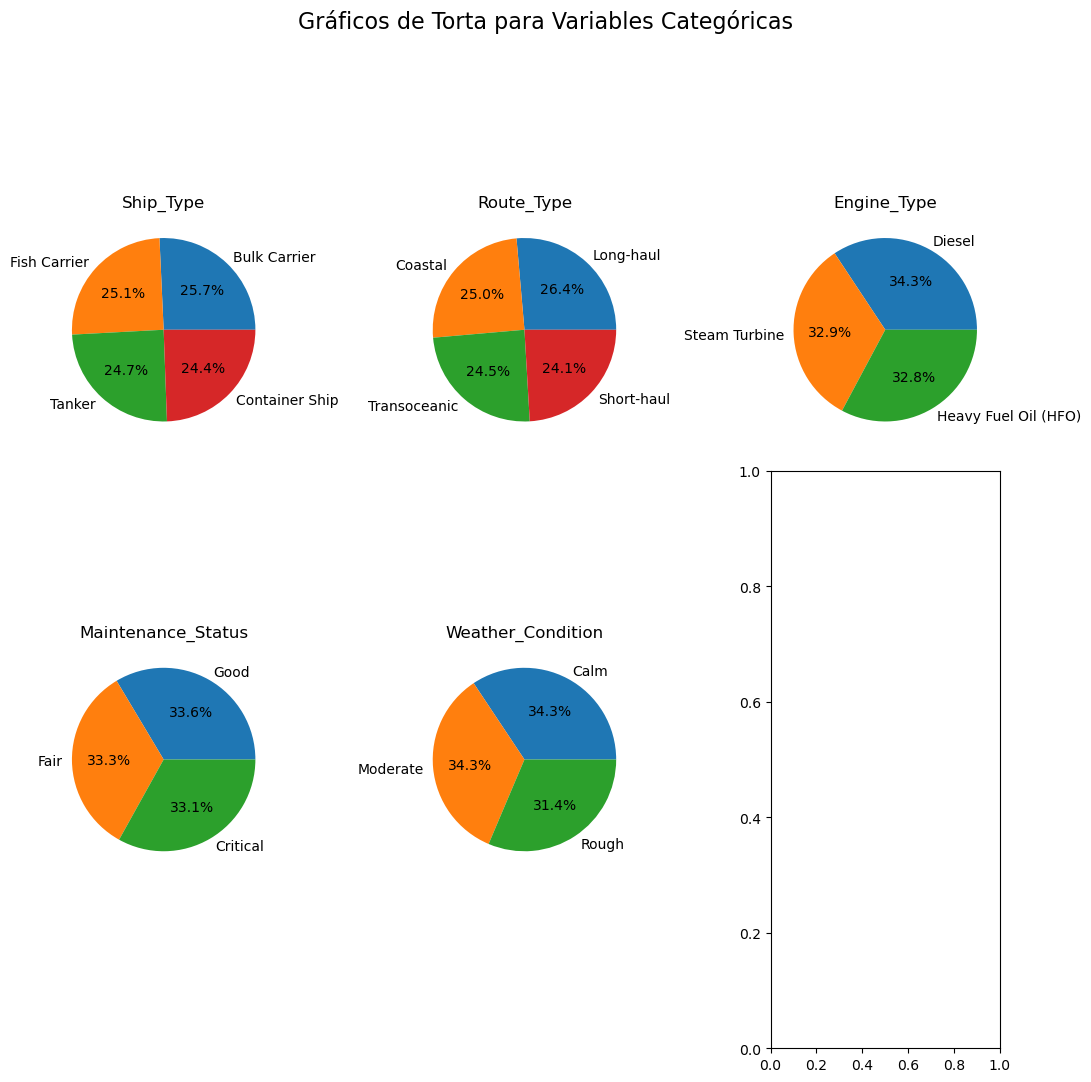

In [30]:
fig, ax = plt.subplots(2 , 3 , figsize=(11,11))
ax =ax.flat
cat_col2  = cat_col.drop(['Date'])  # Excluyendo la columna de fecha
for i, col in enumerate(cat_col2):
 ax[i].pie(x = data[col].value_counts(),
          labels = data[col].value_counts().index,
          autopct = '%.1f%%')
 ax[i].set_title(col)
 fig.tight_layout()
 fig.suptitle('Gráficos de Torta para Variables Categóricas', fontsize=16)
plt.show()

##### c. Análisis de correlación 

<function matplotlib.pyplot.show(close=None, block=None)>

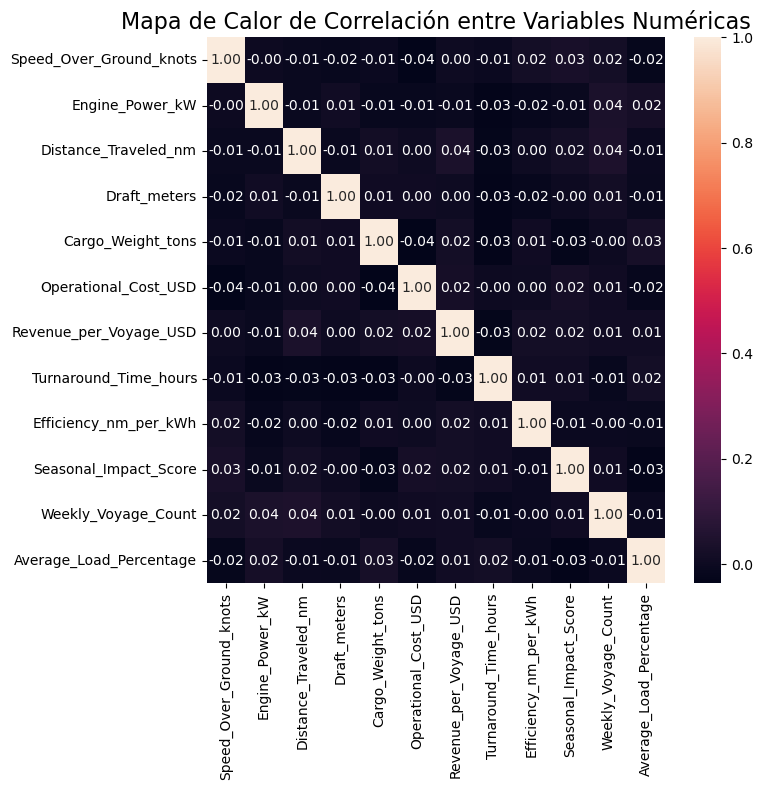

In [9]:
plt.figure(figsize=(8,8))
sns.heatmap(data = data.corr(numeric_only=True), annot=True, fmt='.2f') #heatmap de correlación
plt.title('Mapa de Calor de Correlación entre Variables Numéricas', fontsize=16)
plt.tight_layout()
plt.show

##### d. Conclusión del análisis exploratorio de los datos 

- Apartir de los histogramas de las variables númericas vemos que todas tienen un comportamiento razonable frente a los datos que representa cada una.

- Ninguna de las variables categoricas está desbalanceada, **vamos a eliminar fecha** ya que este no brinda información relevante para la agrupación de los datos 

- No hay correlaciones en las variables numericas, por ende lo eliminaremos ninguna por este criterio.

- Debemos quitar los registros nulos de las variables Ship_Type, Route_Type, Engine_Type, Maintenance_Status, Weather_Condition

### 3. Preparación de los datos 

#### 3.1 Drop de columnas y amputación de nulos

In [33]:
data_mod = data.drop(['Date'], axis=1)  # Eliminamos la columna de fecha 
data_mod = data_mod.dropna(subset=['Ship_Type', 'Route_Type', 'Engine_Type', 'Maintenance_Status', 'Weather_Condition'])  # Eliminamos registros nulos en variables categóricas
data_mod.info()


<class 'pandas.core.frame.DataFrame'>
Index: 2127 entries, 1 to 2735
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Ship_Type                2127 non-null   object 
 1   Route_Type               2127 non-null   object 
 2   Engine_Type              2127 non-null   object 
 3   Maintenance_Status       2127 non-null   object 
 4   Speed_Over_Ground_knots  2127 non-null   float64
 5   Engine_Power_kW          2127 non-null   float64
 6   Distance_Traveled_nm     2127 non-null   float64
 7   Draft_meters             2127 non-null   float64
 8   Weather_Condition        2127 non-null   object 
 9   Cargo_Weight_tons        2127 non-null   float64
 10  Operational_Cost_USD     2127 non-null   float64
 11  Revenue_per_Voyage_USD   2127 non-null   float64
 12  Turnaround_Time_hours    2127 non-null   float64
 13  Efficiency_nm_per_kWh    2127 non-null   float64
 14  Seasonal_Impact_Score    2127

In [34]:
## verificamos si hay nulos en el nuevo dataset
total = len(data_mod)
nulos = data_mod.isnull().sum()
porcentaje_nulos = (nulos / total) * 100
resumen_nulos = pd.DataFrame({'Nulos': nulos, 'Total': total, 'Porcentaje': porcentaje_nulos})
print(resumen_nulos)

                         Nulos  Total  Porcentaje
Ship_Type                    0   2127         0.0
Route_Type                   0   2127         0.0
Engine_Type                  0   2127         0.0
Maintenance_Status           0   2127         0.0
Speed_Over_Ground_knots      0   2127         0.0
Engine_Power_kW              0   2127         0.0
Distance_Traveled_nm         0   2127         0.0
Draft_meters                 0   2127         0.0
Weather_Condition            0   2127         0.0
Cargo_Weight_tons            0   2127         0.0
Operational_Cost_USD         0   2127         0.0
Revenue_per_Voyage_USD       0   2127         0.0
Turnaround_Time_hours        0   2127         0.0
Efficiency_nm_per_kWh        0   2127         0.0
Seasonal_Impact_Score        0   2127         0.0
Weekly_Voyage_Count          0   2127         0.0
Average_Load_Percentage      0   2127         0.0


#### 3.2 Transformación de las variables 

In [35]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder , MinMaxScaler #Onehot ya que no son normales 
from sklearn.pipeline import Pipeline

In [ ]:
num_col =  data_mod.select_dtypes(include= [ 'int64' , 'float64']).columns.to_list()
cat_col = data_mod.select_dtypes(include= [ 'object']).columns.to_list()
# normalizamos las variables numéricas
numtrans = Pipeline(steps= [('caler', MinMaxScaler())])
# codificamos las variables categóricas, quedan más de una columna por variable
# por ejemplo Ship_Type tiene 4 tipos de barcos, entonces se crean 4 columnas
cattrans = Pipeline(steps= [('encoder', OneHotEncoder())])

preprocessor = ColumnTransformer(transformers=[('num', numtrans, num_col),
                                               ('cat', cattrans, cat_col)]
                                 , remainder='passthrough')

preprocessor
                    

ColumnTransformer(remainder='passthrough',
                  transformers=[('num',
                                 Pipeline(steps=[('caler', MinMaxScaler())]),
                                 ['Speed_Over_Ground_knots', 'Engine_Power_kW',
                                  'Distance_Traveled_nm', 'Draft_meters',
                                  'Cargo_Weight_tons', 'Operational_Cost_USD',
                                  'Revenue_per_Voyage_USD',
                                  'Turnaround_Time_hours',
                                  'Efficiency_nm_per_kWh',
                                  'Seasonal_Impact_Score',
                                  'Weekly_Voyage_Count',
                                  'Average_Load_Percentage']),
                                ('cat',
                                 Pipeline(steps=[('encoder', OneHotEncoder())]),
                                 ['Ship_Type', 'Route_Type', 'Engine_Type',
                                  'Maintenance_Status', 'Weather_Condition'])])

In [ ]:
data_pre = preprocessor.fit_transform(data_mod)
data_pre

array([[0.0252187 , 0.51835035, 0.5185334 , ..., 0.        , 0.        ,
        1.        ],
       [0.71686414, 0.45927906, 0.31235678, ..., 0.        , 1.        ,
        0.        ],
       [0.73724575, 0.16560815, 0.55258854, ..., 0.        , 1.        ,
        0.        ],
       ...,
       [0.10667813, 0.96782599, 0.09731343, ..., 0.        , 1.        ,
        0.        ],
       [0.87591574, 0.61129652, 0.29200783, ..., 0.        , 1.        ,
        0.        ],
       [0.10133764, 0.97190775, 0.96503869, ..., 0.        , 1.        ,
        0.        ]], shape=(2127, 29))

In [ ]:
cod_cat = preprocessor.named_transformers_['cat']['encoder'].get_feature_names_out(cat_col)
labels = np.concatenate([cod_cat, num_col])
data_pro = pd.DataFrame(data_pre, columns=labels)
data_pro.head()
# Acá podemos visualizar las nuevas columnas generadas por el preprocesamiento para las variables categóricas

,Ship_Type_Bulk Carrier,Ship_Type_Container Ship,Ship_Type_Fish Carrier,Ship_Type_Tanker,Route_Type_Coastal,Route_Type_Long-haul,Route_Type_Short-haul,Route_Type_Transoceanic,Engine_Type_Diesel,Engine_Type_Heavy Fuel Oil (HFO),...,Distance_Traveled_nm,Draft_meters,Cargo_Weight_tons,Operational_Cost_USD,Revenue_per_Voyage_USD,Turnaround_Time_hours,Efficiency_nm_per_kWh,Seasonal_Impact_Score,Weekly_Voyage_Count,Average_Load_Percentage
0,0.025219,0.518350,0.518533,0.966277,0.057553,0.966614,0.877777,0.854481,0.136018,0.385945,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
1,0.716864,0.459279,0.312357,0.219996,0.065581,0.895450,0.361960,0.623798,0.285686,0.906517,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,0.737246,0.165608,0.552589,0.679530,0.865698,0.513139,0.039180,0.173291,0.431118,0.871380,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
3,0.249169,0.235476,0.716076,0.473158,0.107941,0.566993,0.659079,0.869660,0.880651,0.083444,...,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,0.574456,0.668767,0.345433,0.992633,0.955556,0.356328,0.765010,0.591406,0.908450,0.938453,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


### 4. Construcción del modelo 

#### 4.1 K-Means

##### a. Inertia range (2,25)

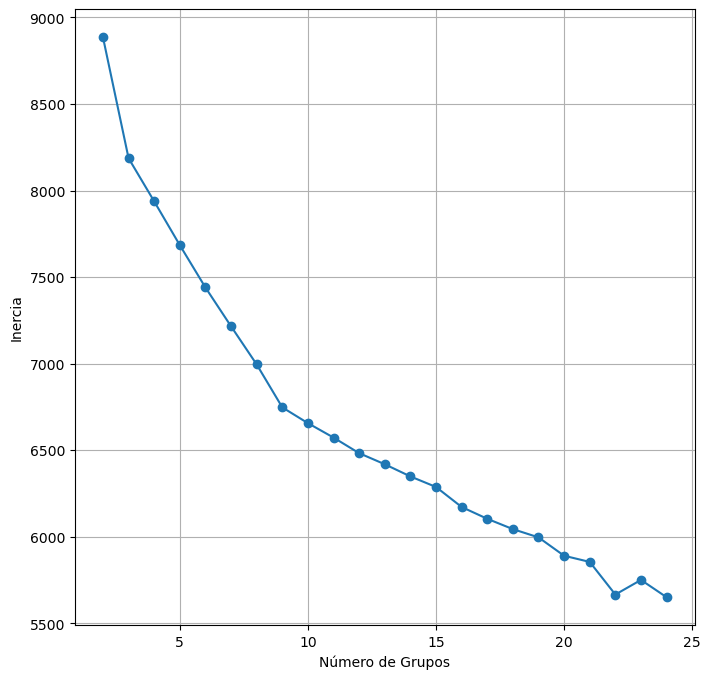

In [49]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score 

rangoK = range(2, 25) #Max lo pondremos en 25
inertia = []

for n_clusters in rangoK:
    kmeansModel = KMeans(n_clusters=n_clusters, 
                    n_init=20,
                    random_state = 123)
    kmeansModel.fit(data_pro)
    inertia.append(kmeansModel.inertia_)
plt.figure(figsize=(8, 8))
plt.plot(rangoK, inertia, marker='o')
plt.xlabel('Número de Grupos')
plt.ylabel('Inercia')
plt.grid()
plt.show()
                    
   

##### b. Inertia con SiloScore

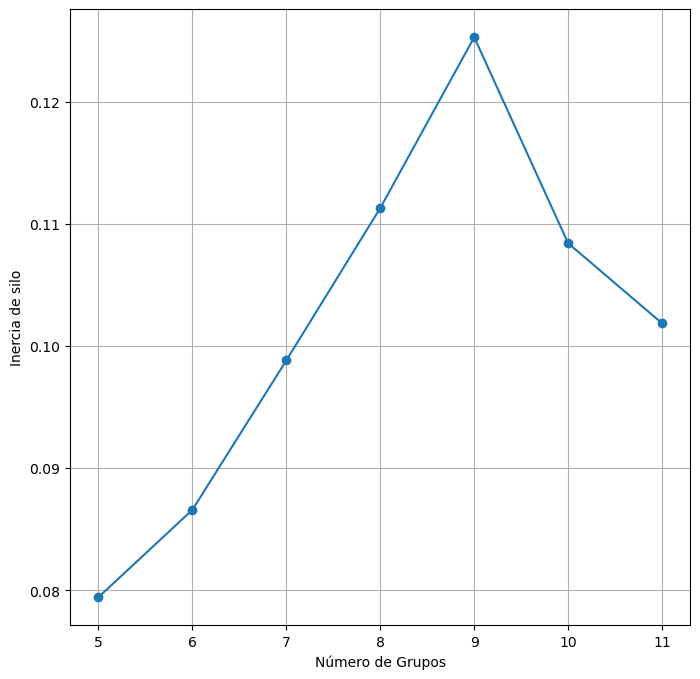

In [52]:
rangeKDefinido = range(5, 12) #Visualmente se ve que el mejor número de grupos es entre 5 y 12 acá se identifica el codo de la grafica
silScore = []
for n_clusters in rangeKDefinido:
    
    kmeansModel = KMeans(n_clusters=n_clusters, 
                    n_init=20,
                    random_state = 123)
    kmeansModel.fit(data_pro)
    clusterLables = kmeansModel.fit_predict(data_pro)
    silAvg = silhouette_score(data_pro, clusterLables)
    silScore.append(silAvg)

plt.figure(figsize=(8, 8))
plt.plot(rangeKDefinido, silScore, marker='o')
plt.xlabel('Número de Grupos')
plt.ylabel('Inercia de silo')
plt.grid()
plt.show()


##### c. Resultado del calculo de grupos para Kmeans
**Despúes de hacer el calculo de inertia de siloet vemos que el la cantidad de con mayor valor sería de 9 grupos
<br>
K = 9**

##### d. ModeloFinal

In [53]:
kmeansFinal = KMeans(n_clusters=9,
                    n_init=20,
                    random_state = 123)
kmeansFinal.fit(data_pro)

KMeans(n_clusters=9, n_init=20, random_state=123)

#### 4.2 Agrupamiento Jerarquico

##### a. Función de dibujo 

In [54]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

def dibujarDendrograma(model, **kwargs):
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count
 
    linkage_matrix = np.column_stack([model.children_, model.distances_, counts]).astype(float)
 
    # Plot
    dendrogram(linkage_matrix, **kwargs)

##### b. Afinidad por promedio

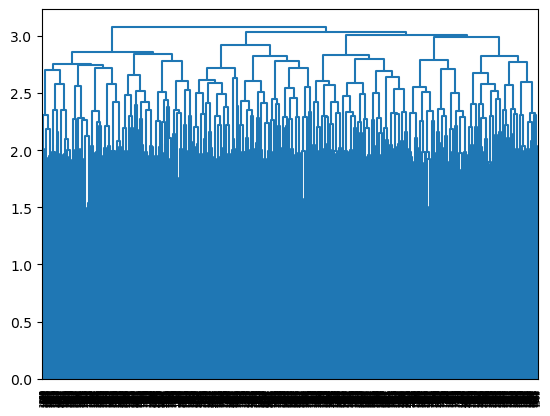

In [ ]:
# Esta afinidad no nos servirá para definir los grupos pero se hace para comprar con la afinidad por varianza
h_cust_mean = AgglomerativeClustering(metric='euclidean',
                                      linkage='average',
                                      distance_threshold=0,
                                      n_clusters=None)
h_cust_mean.fit( X = data_pro)
dibujarDendrograma(h_cust_mean, color_threshold=0)

##### c. Afinidad por varianza

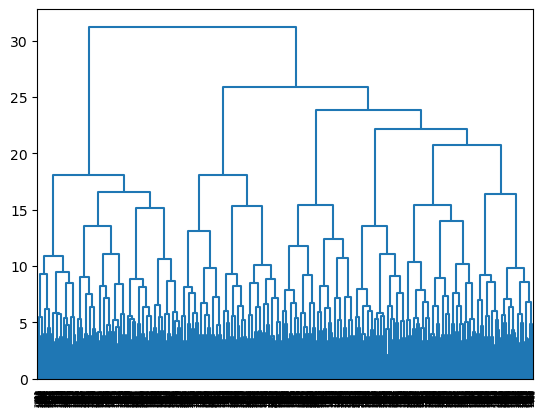

In [56]:
# Varizanza 

h_cust_ward = AgglomerativeClustering(metric='euclidean',
                                      linkage='ward',
                                      distance_threshold=0,
                                      n_clusters=None)
h_cust_ward.fit( X = data_pro)
dibujarDendrograma(h_cust_ward, color_threshold=0)

**Podemos ver que la vertical más larga es la de la izquierda y se divide en 2 aprox en y = 25**

##### d. Dendograma con partida de la vertical

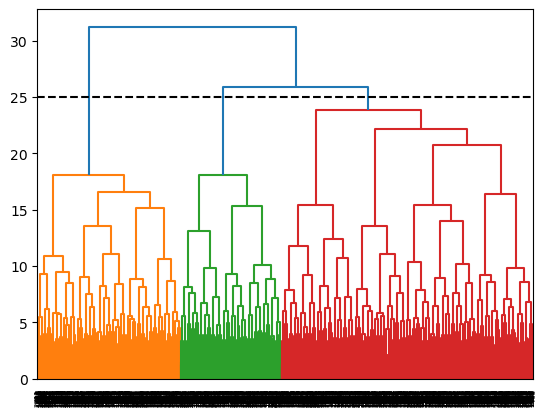

In [ ]:
dendogranPrun = 25 
dibujarDendrograma(h_cust_ward, color_threshold=dendogranPrun)
plt.axhline(y=dendogranPrun, c = 'black', linestyle='--')
plt.show()

**Se evidencia que hay 3 grupos por la intersección con la horizontal**

##### e. Modelo jerarquico final 

In [60]:
hclustFinal = AgglomerativeClustering(metric='euclidean',
                                      linkage='ward',
                                      n_clusters=3)
hclustFinal.fit(data_pro)

AgglomerativeClustering(n_clusters=3)

#### 4.3 DBS

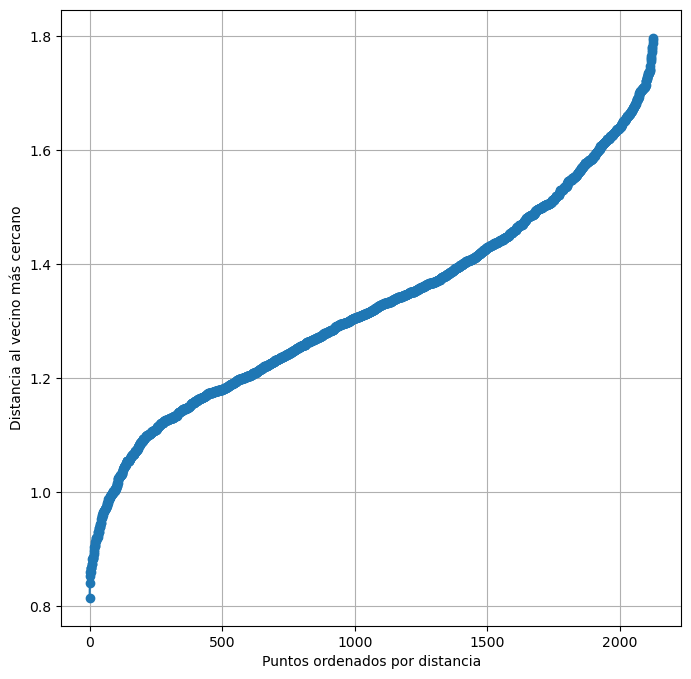

In [62]:
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors 
from itertools import product

neighbours = NearestNeighbors(n_neighbors=3)
neighboursfit = neighbours.fit(data_pro)
distance, indices = neighboursfit.kneighbors(data_pro)
distance = np.sort(distance, axis=0)
distances = distance[:, -1]

plt.figure(figsize=(8, 8))
plt.plot(distances, marker='o')
plt.xlabel('Puntos ordenados por distancia')
plt.ylabel('Distancia al vecino más cercano')
plt.grid()
plt.show()